In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# **Data discovery, exploration, finetuning**

**PLEASE NOTE THAT DIFFERENT RUNNINGS OF THIS NOTEBOOK ARE GOING TO CREATE SLIGHTLY DIFFERENT OUTPUTS FOR SCORES OF THE MODELS, BECAUSE TRAIN AND TEST SETS ARE RANDOMIZED AND DIFFERENT AT EACH ITERATION. THIS WILL EXPLAIN WHY YOU MIGHT SEE COMMENTS OF THE SCORES NOT IN LINE WITH THE PRINTED VALUES**

In [2]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')

print(df.head())
print(df.info())
print(df.describe())



                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

We can observe that this dataset provides play-level technical data for each player/year, as well as overall yearly number of wins and losses. 

It nevertheless lack an essential indicator for the rest of the project, and that we are going to add: the percentage of wins to total number of games played.

In [3]:
df['wins_ratio'] = round(df['Wins']/(df['Wins']+df['Losses']),2)

We are going to take the quantitative variables of the dataset and plot the 'wins_ratio' versus each of them via a scatter plot. It will allow us to identify the variables that matter, those who don't, and to restrict the dataframe to only the indicators relevant for predicting the 'wins_ratio'.

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking', 'wins_ratio'],
      dtype='object')


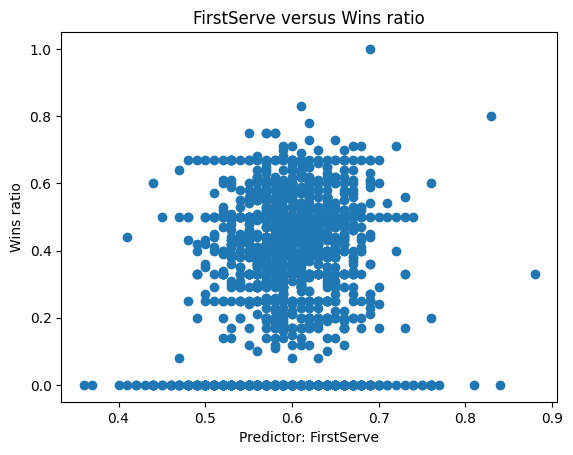

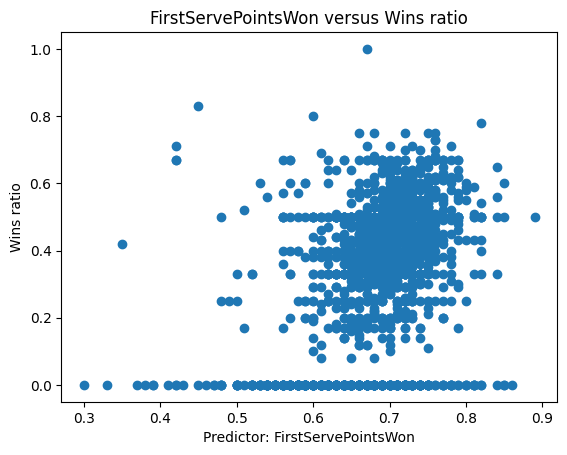

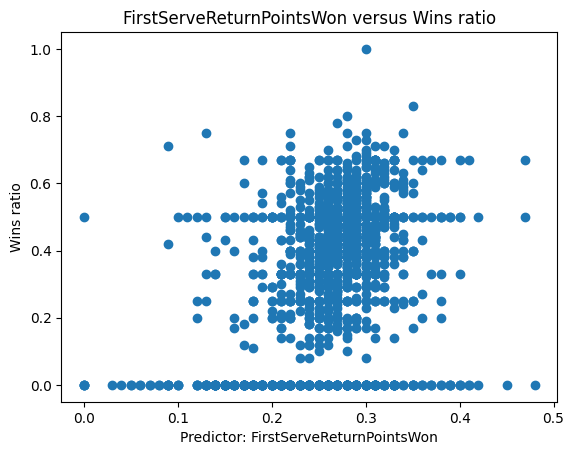

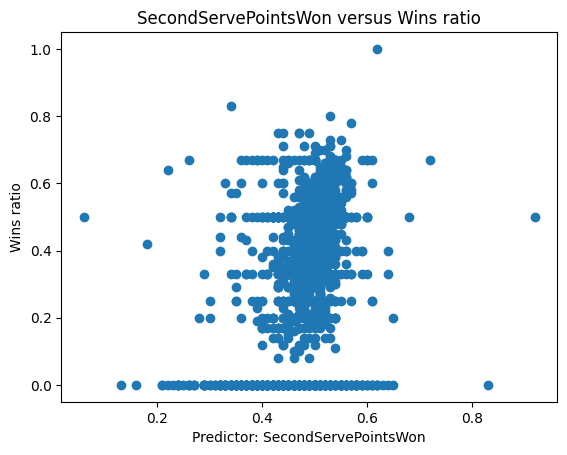

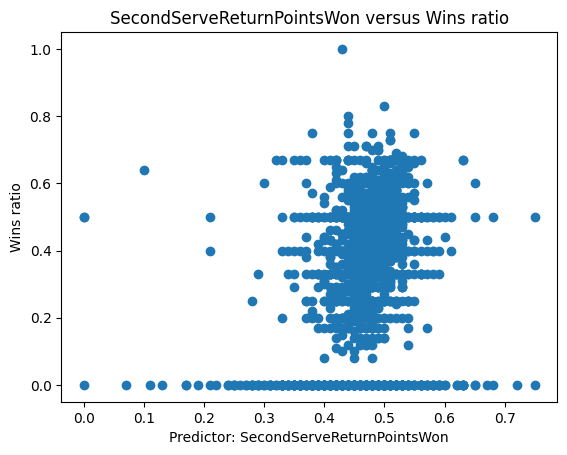

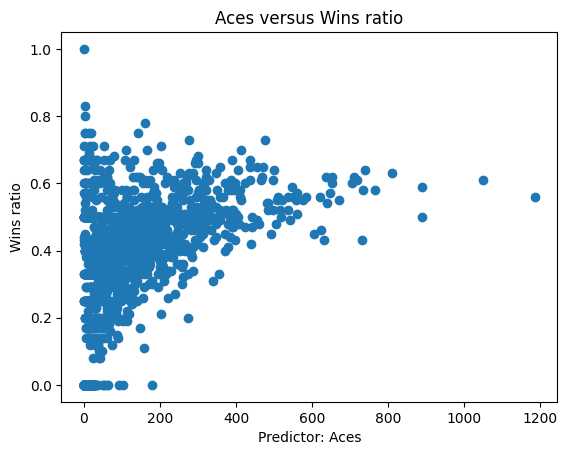

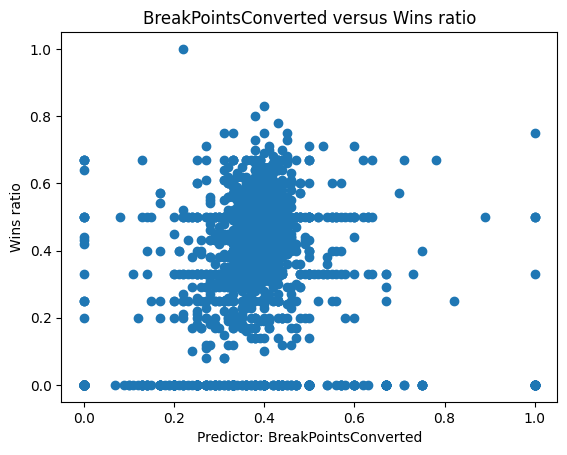

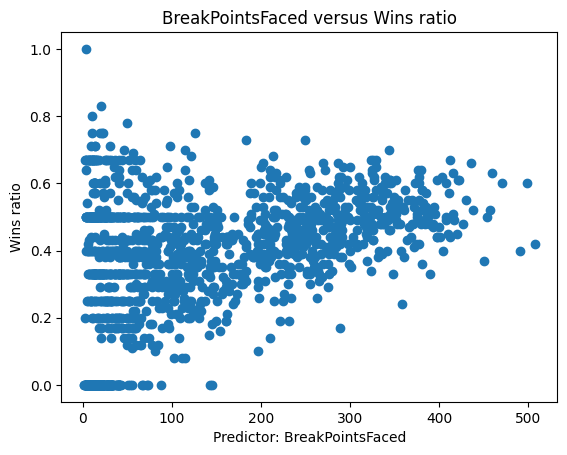

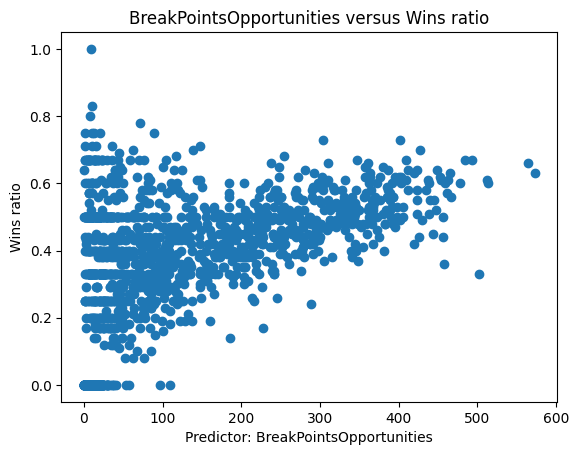

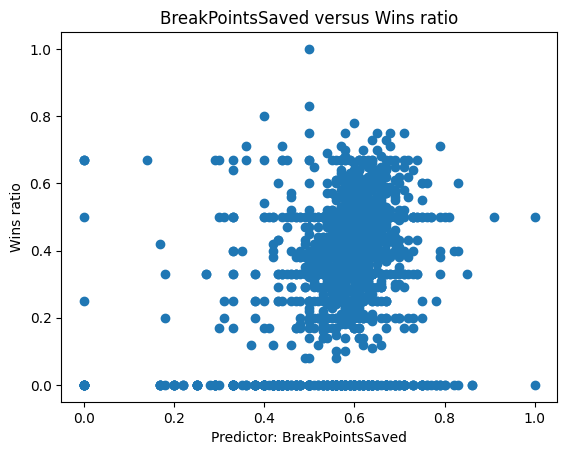

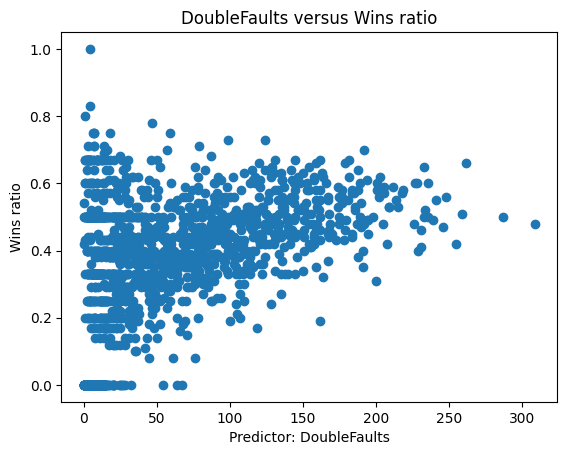

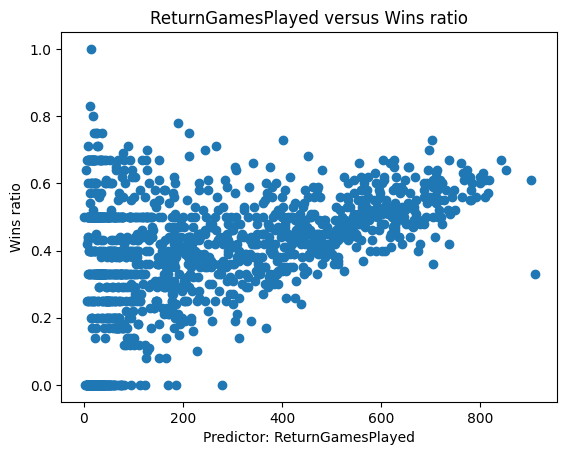

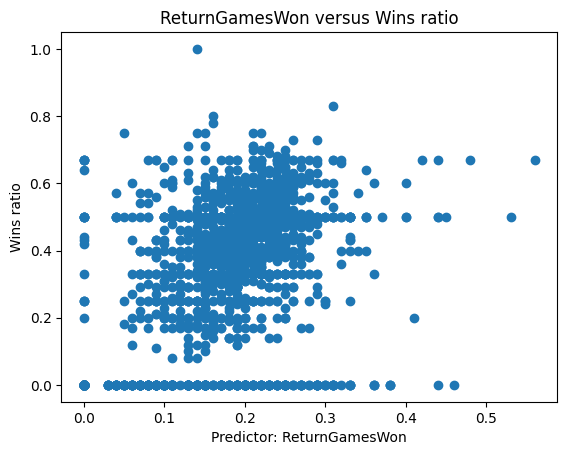

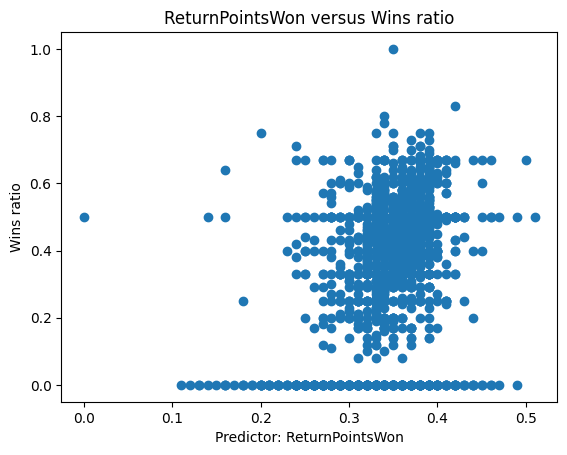

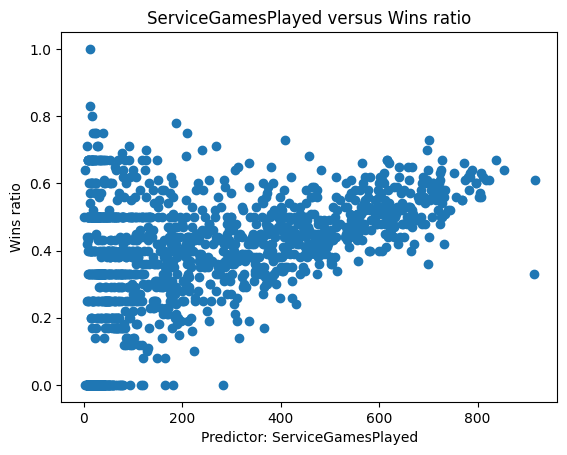

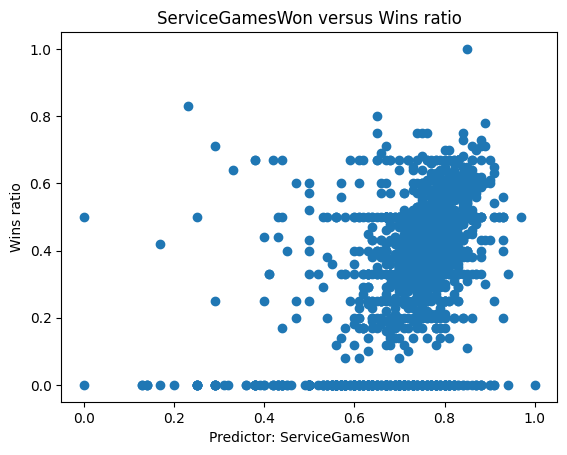

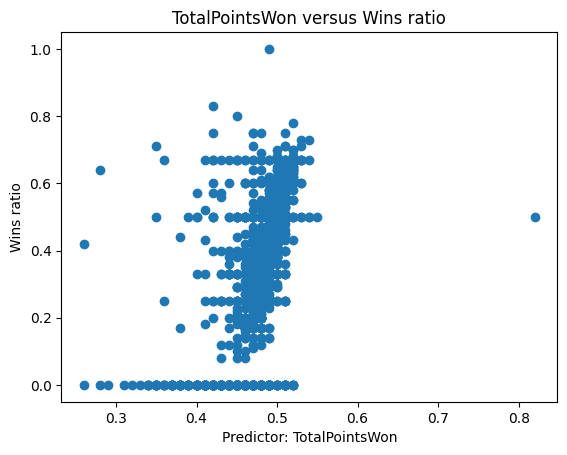

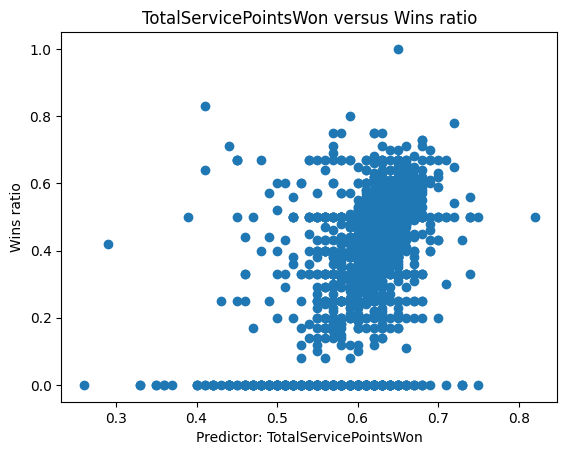

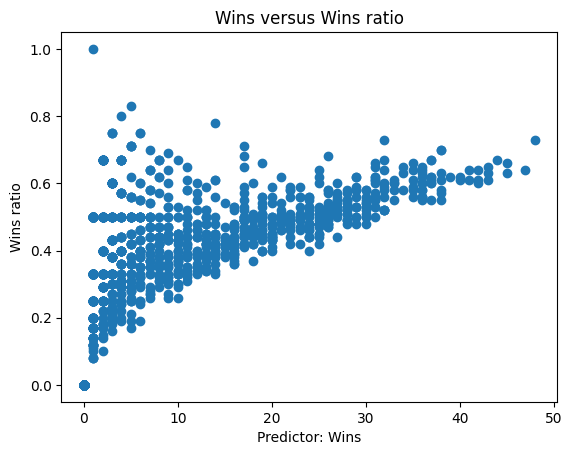

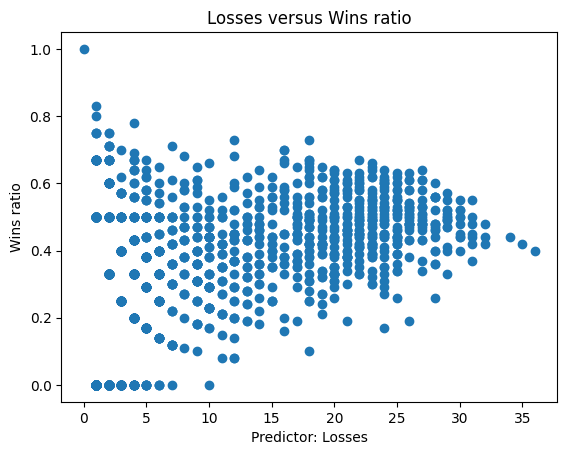

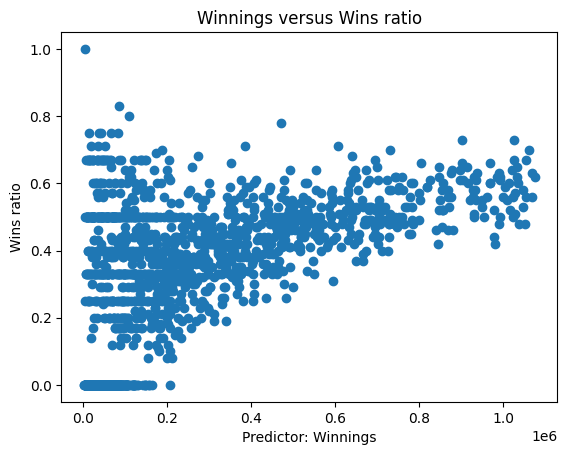

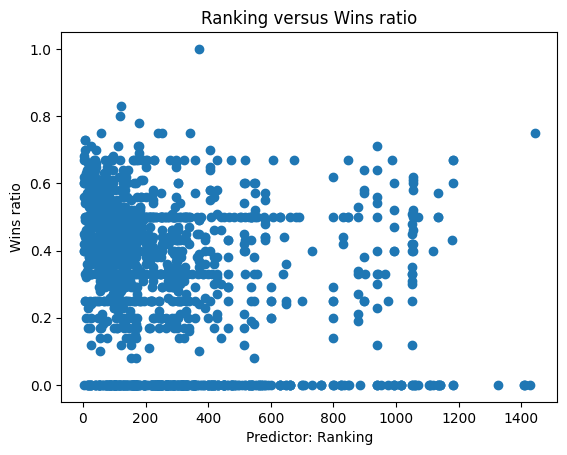

<Figure size 640x480 with 0 Axes>

In [4]:
# perform exploratory analysis here:
print(df.columns)
for variable in df.columns[2:-1]:
    plt.scatter(df[variable],df['wins_ratio'])
    plt.xlabel(f'Predictor: {variable}')
    plt.ylabel('Wins ratio')
    plt.title(f'{variable} versus Wins ratio')
    plt.show()
    plt.clf()

These plots show that some finetuning is going to be necessary. Some statistics appear to have a relationship with the dependent variable, but the problem is that these statistics are total instead of being related to the number of games. If the best players are those who play the most, these statistics will then tend to be higher and therefore correlate with a higher rate of victory. But instead of being the indication of a relationship between them, it might be more an indication that number of games played is simultaneously increasing both of them. Otherwise, we would have to suppose that the more a player makes double faults, the more he wins (as tend to indicate the plot).

In the below cell we will: remove the features that proved irrelevant (redefining the df without those), scale by number of games (wins+losses) the features that display a total, and not a rate. We will also add a calculated feature 'nb_of_games' and examine the relationship between it and 'wins_ratio'. Finally, we will eliminate the records for players with less than 3 games.

In [5]:
df['nb_of_games'] = df['Wins']+df['Losses']
df['Aces'] = round(df['Aces']/df['nb_of_games'],2)
df['BreakPointsFaced'] = round(df['BreakPointsFaced']/df['nb_of_games'],2)
df['BreakPointsOpportunities'] = round(df['BreakPointsOpportunities']/df['nb_of_games'],2)
df['DoubleFaults'] = round(df['DoubleFaults']/df['nb_of_games'],2)
df['ReturnGamesPlayed'] = round(df['ReturnGamesPlayed']/df['nb_of_games'],2)
df['ServiceGamesPlayed'] = round(df['ServiceGamesPlayed']/df['nb_of_games'],2)

df = df[['Player', 'Year', 'FirstServePointsWon','Aces',
       'BreakPointsFaced', 'BreakPointsOpportunities',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon','Winnings',
       'Ranking','nb_of_games','Wins','Losses','wins_ratio']]


df = df[df.nb_of_games >=3].reset_index(drop = True)

              Player  Year  FirstServePointsWon  Aces  BreakPointsFaced  \
0        Pedro Sousa  2016                 0.50  0.00              2.33   
1        Pedro Sousa  2017                 0.60  0.40              2.00   
2        Blaz Kavcic  2009                 0.59  0.60              2.40   
3           Ze Zhang  2010                 0.71  2.20              2.00   
4  Kenny De Schepper  2016                 0.65  5.33              8.67   

   BreakPointsOpportunities  DoubleFaults  ReturnGamesPlayed  ReturnGamesWon  \
0                      2.33          0.67                3.0            0.11   
1                      1.60          0.20                3.8            0.16   
2                      1.40          0.20                3.0            0.27   
3                      1.60          0.80                3.2            0.13   
4                      5.83          1.67               13.5            0.11   

   ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  TotalPoints

Index(['Player', 'Year', 'FirstServePointsWon', 'Aces', 'BreakPointsFaced',
       'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed',
       'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed',
       'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon',
       'Winnings', 'Ranking', 'nb_of_games', 'Wins', 'Losses', 'wins_ratio'],
      dtype='object')


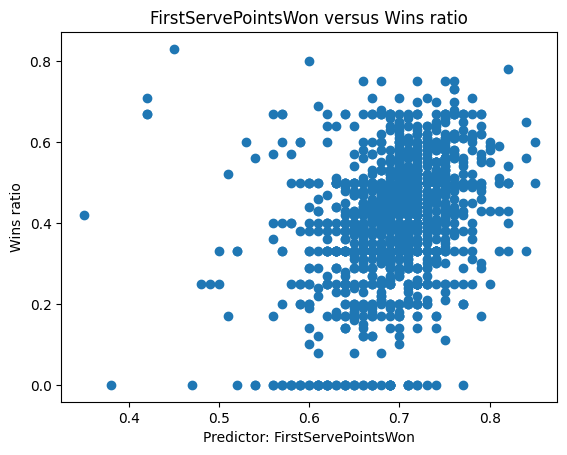

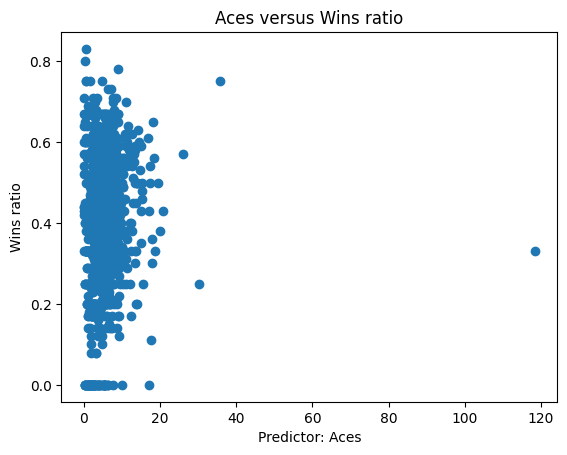

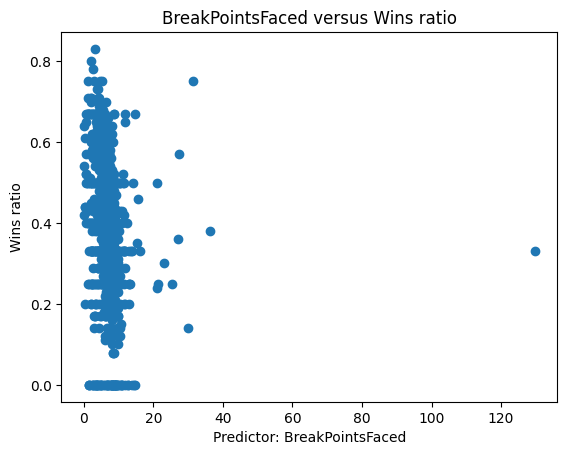

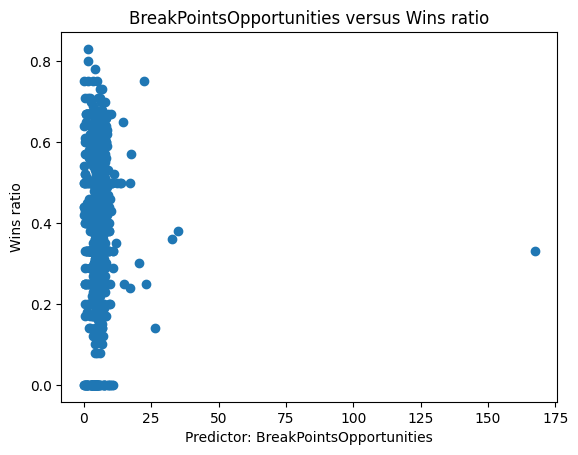

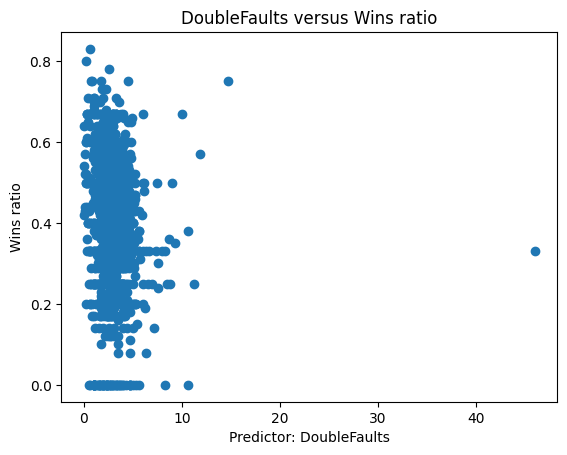

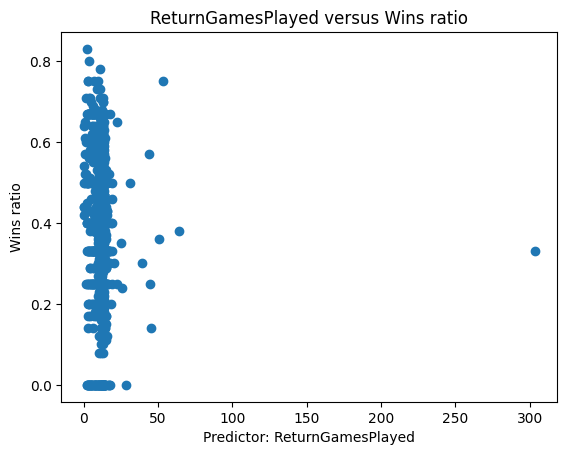

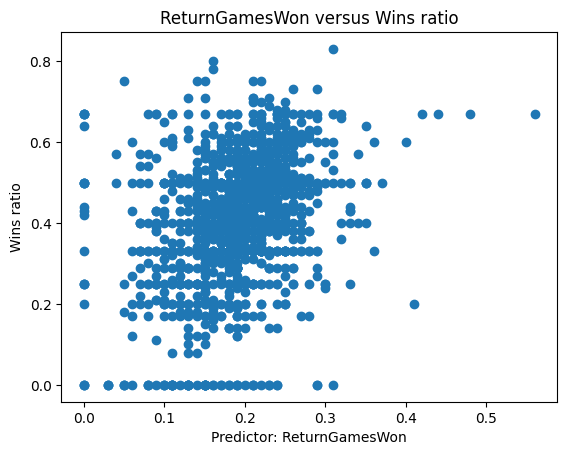

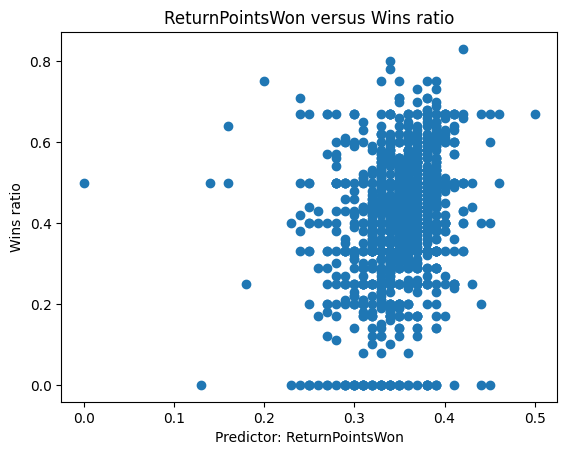

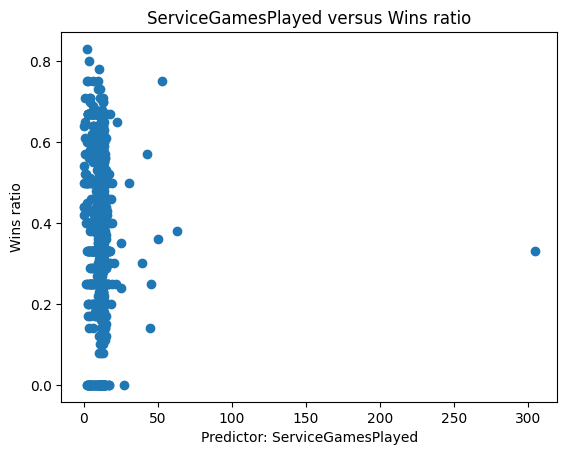

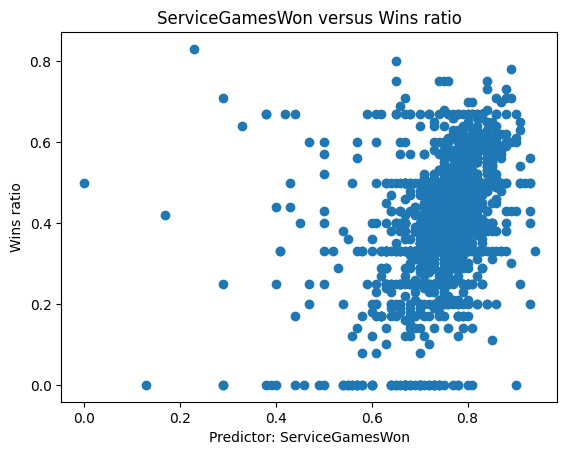

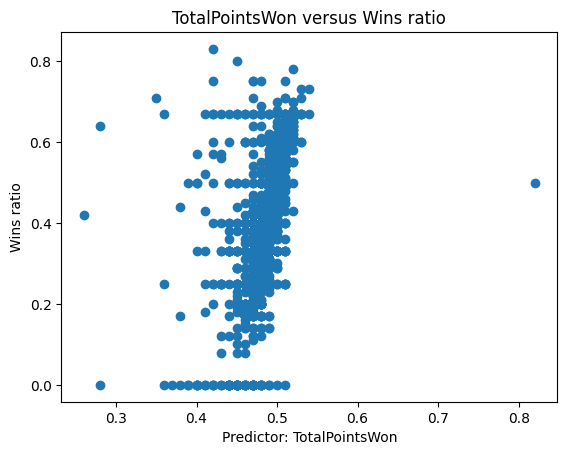

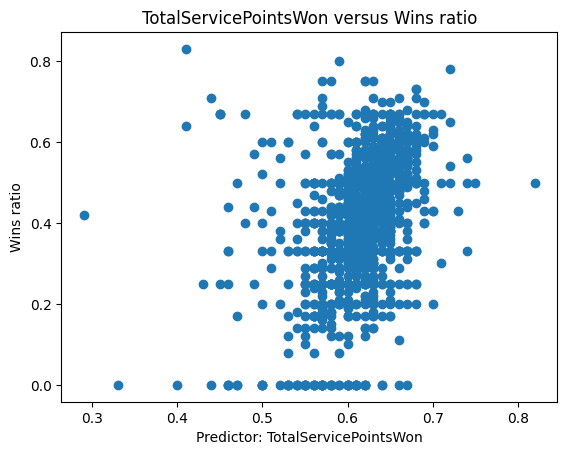

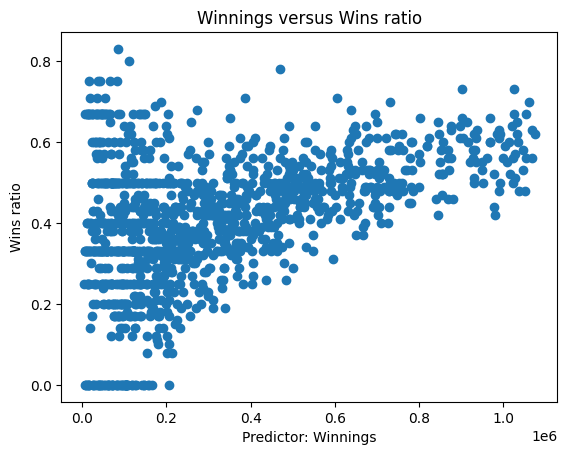

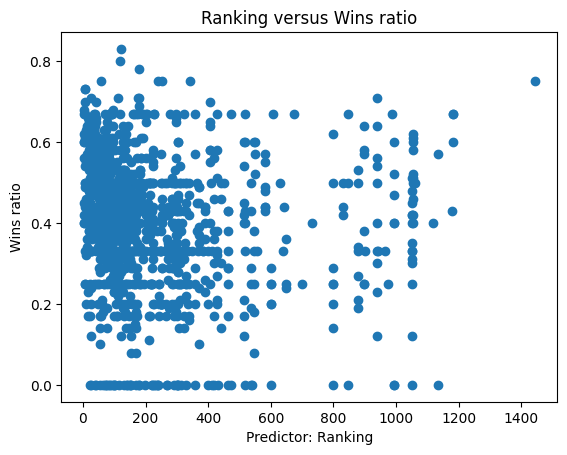

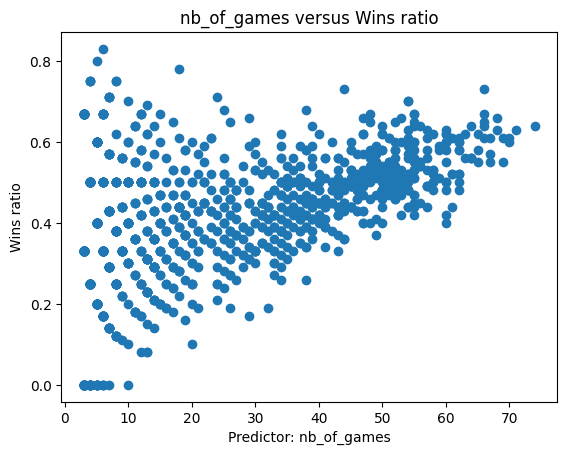

<Figure size 640x480 with 0 Axes>

In [6]:
#We plot again the quantitative variables versus the 'wins_ratio'
print(df.columns)
for variable in df.columns[2:-3]:
    plt.scatter(df[variable],df['wins_ratio'])
    plt.xlabel(f'Predictor: {variable}')
    plt.ylabel('Wins ratio')
    plt.title(f'{variable} versus Wins ratio')
    plt.show()
    plt.clf()

As a conclusion:
* seem to have a positive relationship with 'wins_ratio': 
'FirstServePointsWon',
'ReturnGamesWon',
'ReturnPointsWon',
'ServiceGamesWon',
'TotalPointsWon',
'TotalServicePointsWon',
'Winnings',
'nb_of_games' (in tournaments, those who play the most are also those who win the most, otherwise they get eliminated at the early stages)
* seem to have no but little relationship:
'Aces',
'BreakPointsFaced',
'BreakPointsOpportunities',
'DoubleFaults',
'ReturnGamesPlayed',
'ServiceGamesPlayed',
'Ranking' (can be explained by the fact that players play agains players of similar rankings and therefore have chances of losing despite being at the highest levels)

We are going to do a further elimination of the irrelevant categories, to simplify even more the dataset.

In [7]:

df = df[['Player', 'Year', 'FirstServePointsWon',
       'ReturnGamesWon', 'ReturnPointsWon',
       'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon',
       'Winnings','nb_of_games', 'Wins', 'Losses', 'wins_ratio']]

print(df.head())

              Player  Year  FirstServePointsWon  ReturnGamesWon  \
0        Pedro Sousa  2016                 0.50            0.11   
1        Pedro Sousa  2017                 0.60            0.16   
2        Blaz Kavcic  2009                 0.59            0.27   
3           Ze Zhang  2010                 0.71            0.13   
4  Kenny De Schepper  2016                 0.65            0.11   

   ReturnPointsWon  ServiceGamesWon  TotalPointsWon  TotalServicePointsWon  \
0             0.38             0.50            0.43                   0.50   
1             0.34             0.65            0.45                   0.59   
2             0.38             0.57            0.46                   0.53   
3             0.34             0.80            0.48                   0.61   
4             0.34             0.74            0.48                   0.61   

   Winnings  nb_of_games  Wins  Losses  wins_ratio  
0     39820            3     1       2        0.33  
1    109827           

# **Single Feature Linear Regression (manual)**

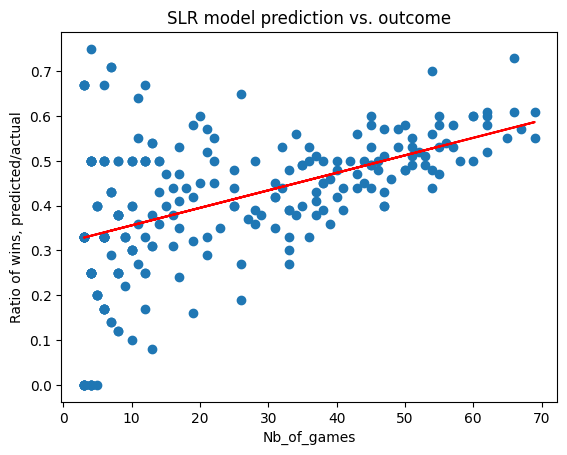

Model parameters(slope,intercept)
[[0.00390715]] [0.31679063]
Model performance for the training set
0.20612606761848296
Model performance for the test set
0.2592767567668337


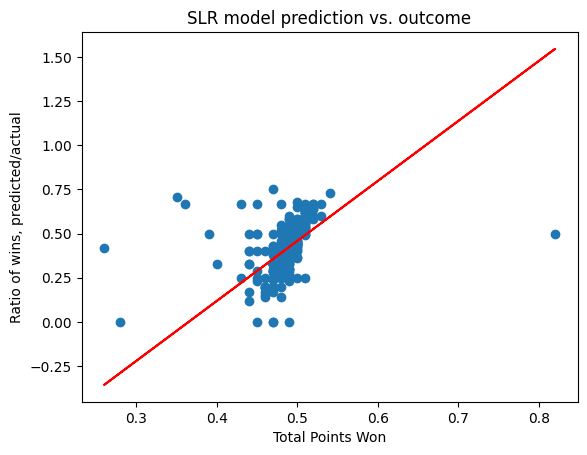

Model parameters(slope,intercept)
[[3.39720999]] [-1.23992419]
Model performance for the training set
0.2701959671118017
Model performance for the test set
-0.1962632200423995


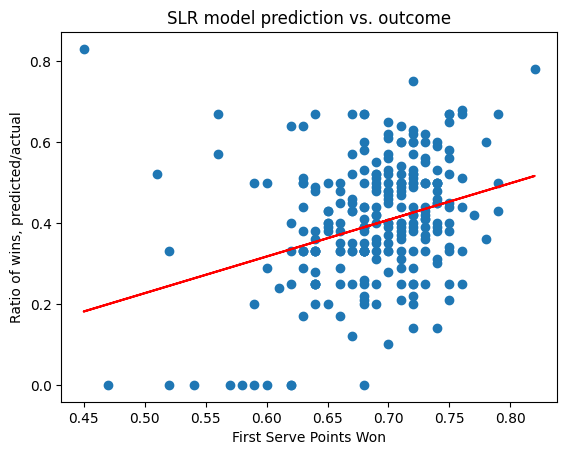

Model parameters(slope,intercept)
[[0.90495792]] [-0.22579495]
Model performance for the training set
0.10199556094618722
Model performance for the test set
0.09597103735983992


In [8]:
## perform single feature linear regressions here:

#at first, we perform regression with independent variable 'nb_of_games'
x = df[['nb_of_games']]
y= df[['wins_ratio']]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
slr = LinearRegression()
slr.fit(x_train,y_train)

y_predict = slr.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,color = 'red')
plt.xlabel('Nb_of_games')
plt.ylabel('Ratio of wins, predicted/actual')
plt.title('SLR model prediction vs. outcome')
plt.show()

print('Model parameters(slope,intercept)')
print(slr.coef_,slr.intercept_)
print('Model performance for the training set')
print(slr.score(x_train, y_train))
print('Model performance for the test set')
print(slr.score(x_test,y_test))

#Now we perform regression with independent variable 'TotalPointsWon'. Hope to get better metrics!
x = df[['TotalPointsWon']]
y= df[['wins_ratio']]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
slr = LinearRegression()
slr.fit(x_train,y_train)

y_predict = slr.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,color = 'red')
plt.xlabel('Total Points Won')
plt.ylabel('Ratio of wins, predicted/actual')
plt.title('SLR model prediction vs. outcome')
plt.show()

print('Model parameters(slope,intercept)')
print(slr.coef_,slr.intercept_)
print('Model performance for the training set')
print(slr.score(x_train, y_train))
print('Model performance for the test set')
print(slr.score(x_test,y_test))

#Not really better. We do a third attempt with 'FirstServePointsWon'!
x = df[['FirstServePointsWon']]
y= df[['wins_ratio']]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
slr = LinearRegression()
slr.fit(x_train,y_train)

y_predict = slr.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,color = 'red')
plt.xlabel('First Serve Points Won')
plt.ylabel('Ratio of wins, predicted/actual')
plt.title('SLR model prediction vs. outcome')
plt.show()

print('Model parameters(slope,intercept)')
print(slr.coef_,slr.intercept_)
print('Model performance for the training set')
print(slr.score(x_train, y_train))
print('Model performance for the test set')
print(slr.score(x_test,y_test))


# **Two Features Linear Regression (automated and comprehensive)**

Overall the single linear regressions that we did performed poorly.
Let's see if we have more success by doing regressions with TWO predictors instead of one.
We will adopt an "industrial" approach by testing, via a loop, all the possible combinations among the variables suspected of having an influence on the ratio of winnings. While testing, we will populate a table that provides the training set and test set scores for each combination. From these two indicators we calculate their average as 'avg_score', an indicator of how the pairs perform overall.

In [9]:
## perform two feature linear regressions here:
predictors = ['FirstServePointsWon', 'ReturnGamesWon',
              'ReturnPointsWon', 'ServiceGamesWon', 'TotalPointsWon','TotalServicePointsWon', 'Winnings', 
              'nb_of_games']
# we will iterate in the 'predictors' list, so as to select all possible pairs of predictors, thanks to a single pointer system
i=0
pairs = []
train_scores = []
test_scores = []
while i < len(predictors)-1:
    for predictor in predictors [i+1:]:
        x = df[[predictors[i],predictor]]
        y = df['wins_ratio']
        pairs.append([predictors[i],predictor])
        x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
        slr = LinearRegression()
        slr.fit(x_train,y_train)
        train_scores.append(slr.score(x_train,y_train))
        test_scores.append(slr.score(x_test,y_test))
    i+=1






double_lr_scores = pd.DataFrame({'pairs':pairs, 'train_score': train_scores, 'test_score': test_scores})
double_lr_scores['avg_score'] = (double_lr_scores.train_score + double_lr_scores.test_score)/2

print(double_lr_scores)

print('Best train score:')
print(double_lr_scores[double_lr_scores.train_score ==double_lr_scores.train_score.max()])
print('Best test score:')
print(double_lr_scores[double_lr_scores.test_score ==double_lr_scores.test_score.max()])
print('Best overall score:')
print(double_lr_scores[double_lr_scores.avg_score ==double_lr_scores.avg_score.max()])

                                           pairs  train_score  test_score  \
0          [FirstServePointsWon, ReturnGamesWon]     0.251192    0.185337   
1         [FirstServePointsWon, ReturnPointsWon]     0.208204    0.178072   
2         [FirstServePointsWon, ServiceGamesWon]     0.131473    0.105237   
3          [FirstServePointsWon, TotalPointsWon]     0.228118    0.165332   
4   [FirstServePointsWon, TotalServicePointsWon]     0.143819    0.080476   
5                [FirstServePointsWon, Winnings]     0.212476    0.232393   
6             [FirstServePointsWon, nb_of_games]     0.238565    0.295874   
7              [ReturnGamesWon, ReturnPointsWon]     0.098306    0.067038   
8              [ReturnGamesWon, ServiceGamesWon]     0.249421    0.179648   
9               [ReturnGamesWon, TotalPointsWon]     0.242486    0.147218   
10       [ReturnGamesWon, TotalServicePointsWon]     0.254958    0.285635   
11                    [ReturnGamesWon, Winnings]     0.240716    0.189558   

The pair 'TotalPointsWon' and 'nb_of_games' is the one giving the best results in a linear regression with two features. 
Better results are obtained using two features instead of one.
Nevertheless, with a score around 30%, it is still much below than the 70% threshold that is commonly used to validate a linear regression model.

# **Three Features Linear Regression (automated and comprehensive)**

Applying a similar programmatic as above, let's see if we find better results when performing the regression with any combination of 3 features.

In [10]:
## scores of regression models with three features
predictors = ['FirstServePointsWon', 'ReturnGamesWon','ReturnPointsWon', 'ServiceGamesWon', 'TotalPointsWon','TotalServicePointsWon', 'Winnings', 'nb_of_games']

i=0
j=1
triplets = []
train_scores_three = []
test_scores_three = []
while i < len(predictors)-2:
    while j<len(predictors)-1:
        for pred in predictors[j+1:]:            
            x = df[[predictors[i],predictors[j],pred]]            
            y = df['wins_ratio']
            triplets.append([predictors[i],predictors[j],pred])
            x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
            slr = LinearRegression()
            slr.fit(x_train,y_train)
            train_scores_three.append(slr.score(x_train,y_train))
            test_scores_three.append(slr.score(x_test,y_test))
        j+=1
    i+=1
    j=i+1
triple_lr_scores = pd.DataFrame({'triplet':triplets, 'train_score': train_scores_three, 'test_score': test_scores_three})
triple_lr_scores['avg_score'] = (triple_lr_scores.train_score + triple_lr_scores.test_score)/2

print(triple_lr_scores)

print('Best train score:')
print(triple_lr_scores[triple_lr_scores.train_score ==triple_lr_scores.train_score.max()])
print('Best test score:')
print(triple_lr_scores[triple_lr_scores.test_score ==triple_lr_scores.test_score.max()])
print('Best overall score:')
print(triple_lr_scores[triple_lr_scores.avg_score ==triple_lr_scores.avg_score.max()])

                                              triplet  train_score  \
0   [FirstServePointsWon, ReturnGamesWon, ReturnPo...     0.261227   
1   [FirstServePointsWon, ReturnGamesWon, ServiceG...     0.259857   
2   [FirstServePointsWon, ReturnGamesWon, TotalPoi...     0.233905   
3   [FirstServePointsWon, ReturnGamesWon, TotalSer...     0.237512   
4     [FirstServePointsWon, ReturnGamesWon, Winnings]     0.296674   
5   [FirstServePointsWon, ReturnGamesWon, nb_of_ga...     0.291200   
6   [FirstServePointsWon, ReturnPointsWon, Service...     0.198715   
7   [FirstServePointsWon, ReturnPointsWon, TotalPo...     0.248370   
8   [FirstServePointsWon, ReturnPointsWon, TotalSe...     0.225209   
9    [FirstServePointsWon, ReturnPointsWon, Winnings]     0.292048   
10  [FirstServePointsWon, ReturnPointsWon, nb_of_g...     0.305209   
11  [FirstServePointsWon, ServiceGamesWon, TotalPo...     0.214803   
12  [FirstServePointsWon, ServiceGamesWon, TotalSe...     0.137144   
13   [FirstServePoin

In [20]:
print(np.array(triple_lr_scores[triple_lr_scores.avg_score ==triple_lr_scores.avg_score.max()]['triplet']))

[list(['ReturnGamesWon', 'TotalServicePointsWon', 'nb_of_games'])]


Better! We now have a set of features with a 37% overall score, which is in progression compared to previous scores with one and two features. But it is still insufficient!

Let's see now with SIX features, how the model performs.

# **Six Features Linear Regression (automated and comprehensive)**

In [11]:
## scores of regression models with six features
# instead of putting in place 5 pointers, we adopt a more pragmatic though brute force approach, using ranges


predictors = ['FirstServePointsWon', 'ReturnGamesWon','ReturnPointsWon', 'ServiceGamesWon', 'TotalPointsWon','TotalServicePointsWon', 'Winnings', 'nb_of_games']

i=0
j=1
sextuplets = []
train_scores_six = []
test_scores_six = []
for a in range(len(predictors)):
    for b in range(1,len(predictors)):
        for c in range(2,len(predictors)):
            for d in range(3,len(predictors)):
                for e in range(4,len(predictors)):
                    for f in range(5,len(predictors)):
                        if pd.Series([a,b,c,d,e,f]).nunique() == 6:
                            x = df[[predictors[a],predictors[b],predictors[c],predictors[d],predictors[e],predictors[f]]]          
                            y = df['wins_ratio']
                            triplets.append([predictors[i],predictors[j],pred])
                            x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
                            slr = LinearRegression()
                            slr.fit(x_train,y_train)
                            sextuplets.append([predictors[a],predictors[b],predictors[c],predictors[d],predictors[e],predictors[f]])
                            train_scores_six.append(slr.score(x_train,y_train))
                            test_scores_six.append(slr.score(x_test,y_test))
    
sextuplets_lr_scores = pd.DataFrame({'sextuplet':sextuplets, 'train_score': train_scores_six, 'test_score': test_scores_six})
sextuplets_lr_scores['avg_score'] = (sextuplets_lr_scores.train_score + sextuplets_lr_scores.test_score)/2

print(sextuplets_lr_scores)

print('Best train score:')
print(sextuplets_lr_scores[sextuplets_lr_scores.train_score ==sextuplets_lr_scores.train_score.max()])
print('Best test score:')
print(sextuplets_lr_scores[sextuplets_lr_scores.test_score ==sextuplets_lr_scores.test_score.max()])
print('Best overall score:')
print(sextuplets_lr_scores[sextuplets_lr_scores.avg_score ==sextuplets_lr_scores.avg_score.max()])
best_combination_six = sextuplets_lr_scores[sextuplets_lr_scores.avg_score ==sextuplets_lr_scores.avg_score.max()]['sextuplet']

                                             sextuplet  train_score  \
0    [FirstServePointsWon, ReturnGamesWon, ReturnPo...     0.266557   
1    [FirstServePointsWon, ReturnGamesWon, ReturnPo...     0.331733   
2    [FirstServePointsWon, ReturnGamesWon, ReturnPo...     0.347118   
3    [FirstServePointsWon, ReturnGamesWon, ReturnPo...     0.329095   
4    [FirstServePointsWon, ReturnGamesWon, ReturnPo...     0.340412   
..                                                 ...          ...   
724  [nb_of_games, ServiceGamesWon, ReturnPointsWon...     0.363362   
725  [nb_of_games, TotalPointsWon, ReturnPointsWon,...     0.321544   
726  [nb_of_games, TotalPointsWon, ReturnPointsWon,...     0.329074   
727  [nb_of_games, TotalServicePointsWon, ReturnPoi...     0.319450   
728  [nb_of_games, Winnings, ReturnPointsWon, Servi...     0.333306   

     test_score  avg_score  
0      0.255263   0.260910  
1      0.218602   0.275167  
2      0.271418   0.309268  
3      0.213083   0.271089  
4 

In [18]:
print(np.array(best_combination_six))
print(np.array(sextuplets_lr_scores[sextuplets_lr_scores.train_score ==sextuplets_lr_scores.train_score.max()]['sextuplet']))

[list(['ReturnPointsWon', 'ReturnGamesWon', 'nb_of_games', 'TotalPointsWon', 'TotalServicePointsWon', 'Winnings'])]
[list(['ReturnPointsWon', 'ReturnGamesWon', 'ServiceGamesWon', 'TotalPointsWon', 'Winnings', 'nb_of_games'])]


We are aware of the inelegance and inefficiency of an approach which is creating multiple combinations of the same 6 elements. But at least we have an answer. Compared to the best triplet's performance, the best sextuplet's is only marginally better.

Finally, we try with all the 8 features.

# **Linear Regression with ALL Features** 

In [17]:
# linear regression with the 8 features

x = df[predictors]          
y = df['wins_ratio']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size = 0.2)
slr = LinearRegression()
slr.fit(x_train,y_train)

print('Train score for the regression with all features')
print(slr.score(x_train,y_train))
print('Test score for the regression with all features')
print(slr.score(x_test,y_test))

                            

Train score for the regression with all features
0.32449366266843405
Test score for the regression with all features
0.37398126403025544


Not better, performs barely better than with 2 features and worse than with 3 or 6 features. 

# **CONCLUSION**

We approached this dataset with the intent of identifying factors that can predict the performance of tennis players. Our first action was precisely to put in place the indicator of this performance in the dataset, which we calculated as the ratio of wins vs. all games played. The overall number of victories is not a proper indicator, because a player may have a high number of wins and still perform poorly, because of having an even higher number of defeats. 

Similarly, we also scaled the statistics expressing a count over the year by the number of games (wins+lost) during the year. The number of games was added to the dataframe.

After exploring, via scatterplots, possible correlation patterns between the dataset's quantitative variables and the ratio of victories, we restricted those variables to the below set of 8:

* 'FirstServePointsWon'
* 'ReturnGamesWon'
* 'ReturnPointsWon'
* 'ServiceGamesWon' 
* 'TotalPointsWon' 
* 'TotalServicePointsWon'
* 'Winnings'
* 'nb_of_games'

We conducted linear regressions with a growing number of features (1,2,3,6,8) and output the train, test and overall R^2 scores (average of train and test scores). 
From regression with 2 features, we made the process "industrial" by applying the model to all possible combinations of features, rather than picking by hand those who seemed to be the most relevant, like we did for the single feature linear regression.
Overall, the performance of the models improved with the number of features until 6 features, but only marginally from two features. Our scores culminated to approx. 40%, which isn't a good score and tends to disqualify the possibility of predicting accurately tennis performance on base of the indicators provided. Rounded best scores for each type of regression are shown below:

| Nb.| Best train score| With | Best test score | With | Best overall score | With |
|----|-----------------|------|-----------------|------|--------------------|------|                     
| 1  | 0.27| TotalPointsWon | 0.26 | nb_of_games | 0.23 | nb_of_games |
| 2 | 0.30 | TotalPointsWon, Winnings | 0.40 | TotalPointsWon, nb_of_games | 0.34 | TotalPointsWon, nb_of_games|
| 3 | 0.34 | TotalPointsWon, Winnings, nb_of_games | 0.44 | ReturnGamesWon, TotalServicePointsWon, nb_of_games | 0.37 | ReturnGamesWon, TotalServicePointsWon, nb_of_games |
| 6 | 0.41 | ReturnPointsWon, ReturnGamesWon, ServiceGamesWon, TotalPointsWon, Winnings, nb_of_games | 0.47 | ReturnPointsWon, ReturnGamesWon, nb_of_games, TotalPointsWon, TotalServicePointsWon, Winnings | 0.39 | ReturnPointsWon, ReturnGamesWon, nb_of_games, TotalPointsWon, TotalServicePointsWon, Winnings |
| 8 | 0.32 | ALL | 0.37 | ALL | 0.35 | ALL |



